In [1]:
import COCOKeypointAnnotations
import json
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle


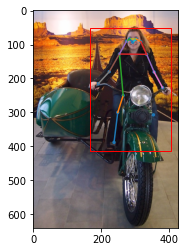

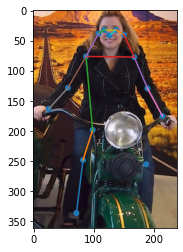

In [3]:
    annotationFileName = 'f:\\home\\Data\\COCO\\annotations\\person_keypoints_val2017.json'
    imageFolder = 'f:\\home\\Data\\COCO\\val2017'
    imageIndex = 1000
    kpas = COCOKeypointAnnotations.COCOKeypointAnnotations(annotationFileName, imageFolder)
    filename = kpas.getImageFilename(imageIndex)
    bbox = kpas.getBoundingBox(imageIndex)

    image = mpimg.imread(filename)
    plt.imshow(image)

    # Get the current reference
    ax = plt.gca()

    # Create a Rectangle patch
    x0 = bbox[0]
    y0 = bbox[1]
    w = bbox[2]
    h = bbox[3]
    rect = Rectangle((x0, y0), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    keypoints = kpas.getKeypoints(imageIndex)
    for k in keypoints:
        if k.v == 2:
            circ = Circle((k.x, k.y), 5)
            ax.add_patch(circ)
    # Plot the skeleton
    for s in kpas.skeleton:
        kp0 = keypoints[s[0]-1]
        kp1 = keypoints[s[1]-1]
        if (kp0.v == 2) and (kp1.v == 2):
            plt.plot((kp0.x, kp1.x), (kp0.y, kp1.y))

    plt.show()

    x1 = math.ceil(x0+w)
    x0 = math.floor(x0)
    y1 = math.ceil(y0+h)
    y0 = math.floor(y0)
    subImage = image[y0:y1, x0:x1, :]
    plt.imshow(subImage)
    # Get the current reference
    ax = plt.gca()

    subImageKeypoints = []
    for k in keypoints:
        sik = COCOKeypointAnnotations.Keypoint(k.x-x0, k.y-y0, k.v, k.name)
        subImageKeypoints.append(sik)

    for k in subImageKeypoints:
        if k.v == 2:
            circ = Circle((k.x, k.y), 5)
            ax.add_patch(circ)

    # Plot the skeleton
    for s in kpas.skeleton:
        kp0 = subImageKeypoints[s[0]-1]
        kp1 = subImageKeypoints[s[1]-1]
        if (kp0.v == 2) and (kp1.v == 2):
            plt.plot((kp0.x, kp1.x), (kp0.y, kp1.y))

    plt.show()
